# Importing Libraries

## In this notebook, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network

## Dataset link: https://archive.ics.uci.edu/dataset/366/activity+recognition+system+based+on+multisensor+data+fusion+arem

In [ ]:
import pandas as pd
import numpy as np
from io import StringIO
from scipy.io import arff
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.api as stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import glob
import pandas as pd
import itertools
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
import warnings
from numpy import mean
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV
from IPython.display import Image

# 1. a,b) Importing the data

In [ ]:
bending_folders = ['bending1/', 'bending2/']
train_df_b = []
test_df_b = []
bending_labels_train = []
bending_datasets_train = []
bending_labels_test = []
bending_datasets_test = []


for folder in bending_folders:
    #print('inside folder', folder)
    path = r'../Data/AReM/' + folder
    filenames = glob.glob(path + "/*.csv")
    test_files = ['' + path + 'dataset1.csv', '' + path + 'dataset2.csv']
    error_file = '../Data/AReM/bending2/dataset4.csv'



    for filename in filenames:



        if filename not in test_files:
            if filename == error_file:
                #print('ERROR FILE ENCOUNTERED')
                continue
            #print('train appended with', filename)
            train_df_b.append(pd.read_csv(filename, skiprows= 5, on_bad_lines='skip', header = None))
            bending_datasets_train.append(filename)
            bending_labels_train.append(folder)

        else:
            #print('+ test appended with', filename)
            test_df_b.append(pd.read_csv(filename, skiprows= 5,on_bad_lines='skip', header = None))
            bending_datasets_test.append(filename)
            bending_labels_test.append(folder)

    # Concatenate all data into one DataFrame
bending_frame_train = pd.concat(train_df_b, ignore_index=True)
bending_frame_test = pd.concat(test_df_b, ignore_index=True)

In [ ]:
ds4 = pd.read_csv('../Data/AReM/bending2/dataset4.csv', skiprows = 5, on_bad_lines='skip', header=None)
sp = []
bending_labels_train.append('../Data/AReM/bending2/dataset4.csv')
bending_datasets_train.append(path + 'dataset4/')
for i in range (0, len(ds4)):
    sp.append(ds4.iloc[i].values[0].split(' '))

new = pd.DataFrame(sp)
new = new.drop(7, axis = 1)
new = new.astype(float)
train_df_b.append(new)

In [ ]:
bending_labels_train

['bending1/',
 'bending1/',
 'bending1/',
 'bending1/',
 'bending1/',
 'bending2/',
 'bending2/',
 'bending2/',
 '../Data/AReM/bending2/dataset4.csv']

In [ ]:
bending_datasets_test

['../Data/AReM/bending1/dataset1.csv',
 '../Data/AReM/bending1/dataset2.csv',
 '../Data/AReM/bending2/dataset1.csv',
 '../Data/AReM/bending2/dataset2.csv']

In [ ]:
other_folders = ['lying/', 'sitting/', 'standing/', 'walking/', 'cycling/']
train_df_o = []
test_df_o = []
other_labels_train = []
other_datasets_train = []
other_labels_test = []
other_datasets_test = []

for folder in other_folders:
    #print('inside folder', folder)
    path = r'../Data/AReM/' + folder
    filenames = glob.glob(path + "/*.csv")
    #print(filenames)
    test_files = ['' + path + 'dataset1.csv', '' + path + 'dataset2.csv', '' + path + 'dataset3.csv']


    for filename in filenames:


        if filename not in test_files:
            #print('train appended with', filename)
            train_df_o.append(pd.read_csv(filename, skiprows= 5, on_bad_lines='skip', header = None))
            other_labels_train.append(folder)
            other_datasets_train.append(filename)
        else:
            #print('test appended with', filename)
            test_df_o.append(pd.read_csv(filename, skiprows= 5, on_bad_lines='skip' , header = None))
            other_labels_test.append(folder)
            other_datasets_test.append(filename)

    # Concatenate all data into one DataFrame
other_frame_train = pd.concat(train_df_o, ignore_index=True)
other_frame_test = pd.concat(test_df_o, ignore_index=True)

### Making seperate files for train and test instances for future usage

In [ ]:
Train_data = pd.concat([bending_frame_train, other_frame_train], ignore_index=True)
Test_data = pd.concat([bending_frame_test, other_frame_test], ignore_index=True)
All_data = pd.concat([Train_data, other_frame_train], ignore_index=True)
all_instances = train_df_b + train_df_o + test_df_b + test_df_o
all_labels = bending_labels_train + other_labels_train + bending_labels_test + other_labels_test
all_files = bending_datasets_train + other_datasets_train + bending_datasets_test + other_datasets_test
TTS = ['train'] * (len(bending_datasets_train) + len(other_datasets_train)) + ['test'] * (len(bending_datasets_test) + len(other_datasets_test))


# 1.c. i) What types of Time domain features are usually used in time series classification

#### The following features are generally used in time series classification similar to the current problem statement:
#### Mean of all the parameters/n
#### Minimum and Maximum of all of the data
#### Median
#### The inter quartile ranges
#### Standard Deviations
#### Cross correlations between each feature to every other feature
#### Skewness (which is a measure of how lopsided the data is as compared to a normal distribution)
#### Kurtosis (a measure of whether the data is heavily tailed or light tailed as compared to a normal distribution. A heavily tailed kurtoiss will have more outliers)

# Extracting the time-domain features

In [ ]:
initial_columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
indexes = test_df_o[0].drop(0, axis =1).describe().index.tolist()

### Creating column names for Time-domain Features

In [ ]:
column = []
for i in range (1, 7):
    for title in indexes:
        column.append('' + title + str(i))

### Creating the Raw Dataset with all Time-Domain Features

In [ ]:
TDF = pd.DataFrame(columns = column)
i = 0
for df in  all_instances:
    i = i+1
    stats = []

    for i in range (1, df.drop(0, axis =1).describe().shape[1] + 1):
        stats.append(df.drop(0, axis =1).describe()[i].values.tolist())

    row = list(itertools.chain.from_iterable(stats))
    #list = ["Hyperion", 27000, "60days", 2000]
    TDF.loc[len(TDF)] = row
    #TDF = TDF.append(row, axis = 0)

### Removing unnecessary feature (Count)

In [ ]:
drop_these = []
for i in range (1, 7):
    drop_these.append('count' +  str(i))
TDF = TDF.drop(drop_these, axis = 1)

### Reordering and Renaming the columns

In [ ]:


new_columns = []
ks = ['min','max', 'mean', '50%', 'std',  '25%',  '75%' ]
for i in range (1, 7):
    for f in ks:
        new_columns.append(f +  str(i))
newTDF = TDF.reindex(columns=new_columns)

rename_columns = []
tdf = ['min', 'max', 'mean', 'median', 'std_dev', '1st quart', '3rd quart']
for i in range (1, 7):
    for f in tdf:
        rename_columns.append(f +  str(i))
TDF = newTDF.set_axis(rename_columns, axis=1, inplace=False)

## Output Dataframe with all features

In [ ]:
TDF

,min1,max1,mean1,median1,std_dev1,1st quart1,3rd quart1,min2,max2,mean2,...,std_dev5,1st quart5,3rd quart5,min6,max6,mean6,median6,std_dev6,1st quart6,3rd quart6
0,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.0,2.96,0.555313,0.490,0.487826,0.00,0.83
1,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.0,5.26,0.679646,0.500,0.622534,0.43,0.87
2,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.00
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.50
4,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,12.50,45.00,33.509729,34.125,4.850923,30.50,36.7500,0.0,13.05,4.450771,...,3.133564,14.6275,18.75,0.0,8.96,3.378479,3.085,1.787360,2.06,4.44
84,15.00,46.75,34.660583,35.000,5.315110,31.00,38.2500,0.0,13.44,4.200896,...,3.155015,14.2500,18.50,0.0,8.99,3.244396,3.000,1.630983,2.12,4.24
85,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,2.374208,...,2.890347,17.9500,21.75,0.0,9.34,2.921729,2.500,1.852600,1.50,3.90
86,28.75,44.75,37.561188,36.875,3.226507,35.25,40.2500,0.0,9.91,2.080688,...,2.727377,18.0000,21.50,0.0,9.62,2.765896,2.450,1.769203,1.41,3.77


# Standard deviation of each feature and Bootstrap confidence interval for Standard Deviation

### Calculating the true Standard Devations of each feature in the TDF table

In [ ]:
stds = []
for column in TDF.columns:
    stds.append(TDF[column].std())
STDs = pd.DataFrame({'Feature': TDF.columns, 'Standard Deviation': stds})

### The following are the Standard Deviations of each feature

In [ ]:
STDs

,Feature,Standard Deviation
0,min1,9.569975
1,max1,4.394362
2,mean1,5.335700
3,median1,5.440054
4,std_dev1,1.772185
5,1st quart1,6.153874
6,3rd quart1,5.138925
7,min2,0.000000
8,max2,5.062729
9,mean2,1.574198


### Bootstrap on each Feature

In [ ]:
Bootstrap_Output = pd.DataFrame(columns = ['Feature', 'Lower Bound', 'Upper Bound',  'Actual Standard Deviation', 'True Value in Range?'])

for feature in TDF.columns:
    #FOR EACH NUMBER IN SAMPLE, MAKE A 1000 MORE NUMBERS
    bs = np.random.choice(TDF[feature], (50,1000), replace=True)
    #NOW WE HAVE DATA OF A 30 SAMPLES WITH EACH SAMPLE HAVING 1000 DATA POINTS
    #CHECK IF 1000 should be 88 IN THIS
    bs_stds = bs.std(axis=0)
    #bs_stds.shape
    #NOW WE HAVE 1000 STANDARD DEVIATIONS
    #THE MEAN OF STANDARD DEVIATIONS OF ALL THE RESAMPLED DATA
    bs_std_mean = bs_stds.mean()
    #print(bs_std_mean)
    #THE ABOVE MEAN SHOULD BE CLOSE TO THE ACTUAL STANDARD DEVIATION OF THE ORIGINAL DATA WHICH IS
    std_true = TDF[feature].std()
    #print(std_true)
    #CONFIDENCE INTERVALS OF THE POPULATION STANDARD DEVIATIONS
    lower_ci = np.quantile(bs_stds, 0.05)
    upper_ci = np.quantile(bs_stds, 0.95)
    #lower_ci, upper_ci
    if (lower_ci <= std_true<= upper_ci):
        check = 'yes'
    else:
        check = 'no'
    #print('Lower bound: ', lower_ci,  '   Upper bound: ', upper_ci, '   Actual: ', std_true )
    #print('Lower bound: ', lower_ci)
    #print('Mean of Standard deviation Resampled : ', bs_std_mean)
    next = [feature, lower_ci,upper_ci, std_true, check]
    Bootstrap_Output.loc[len(Bootstrap_Output)] = next
    #print('Actual: ', std_true)

In [ ]:
Bootstrap_Output

,Feature,Lower Bound,Upper Bound,Actual Standard Deviation,True Value in Range?
0,min1,7.739483,11.094237,9.569975,yes
1,max1,2.989880,5.459139,4.394362,yes
2,mean1,4.442521,6.019079,5.335700,yes
3,median1,4.538343,6.115345,5.440054,yes
4,std_dev1,1.489760,1.984549,1.772185,yes
5,1st quart1,5.280652,6.757809,6.153874,yes
6,3rd quart1,3.986135,6.048365,5.138925,yes
7,min2,0.000000,0.000000,0.000000,yes
8,max2,4.437443,5.470776,5.062729,yes
9,mean2,1.334225,1.726204,1.574198,yes


# Observations:**

The relative movements of these points are what differentiate each action (eg. bending, cycling).

The minimum and maximum values can be individually very insightful. This is because the body movement may require two or more of the sensor points to come very close to each other or go apart and this may be a distinguishing feature of the action. For instance in bending2, distance between all 3 sensor points will have a relatively low Min value since the abdomen and legs come close together.

Apart from this, the standard deviation value may hold more information about the way the body has moved. A larger standard deviation in distance implies larger range of movement between the two sensors. A larger standard deviation in 'var' implies sudden jerks, as opposed to a smaller standard deviation that implies smooth continuous movements or no movements (lying has all 'var' columns constant, almost equal to 0).

### Hence, Minimum, Maximum and Standard Deviation are the 3 most important time domain features in my opinion.

# Binary and Multiclass Classification

In [ ]:
TDF

,min1,max1,mean1,median1,std_dev1,1st quart1,3rd quart1,min2,max2,mean2,...,min6,max6,mean6,median6,std_dev6,1st quart6,3rd quart6,labels,files,split
0,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,0.0,2.96,0.555313,0.490,0.487826,0.00,0.83,bending1/,../Data/AReM/bending1/dataset7.csv,train
1,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,0.0,5.26,0.679646,0.500,0.622534,0.43,0.87,bending1/,../Data/AReM/bending1/dataset6.csv,train
2,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,0.0,2.18,0.613521,0.500,0.524317,0.00,1.00,bending1/,../Data/AReM/bending1/dataset4.csv,train
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,0.0,1.79,0.383292,0.430,0.389164,0.00,0.50,bending1/,../Data/AReM/bending1/dataset5.csv,train
4,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,0.0,1.79,0.493292,0.430,0.513506,0.00,0.94,bending1/,../Data/AReM/bending1/dataset3.csv,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,12.50,45.00,33.509729,34.125,4.850923,30.50,36.7500,0.0,13.05,4.450771,...,0.0,8.96,3.378479,3.085,1.787360,2.06,4.44,walking/,../Data/AReM/walking/dataset2.csv,test
84,15.00,46.75,34.660583,35.000,5.315110,31.00,38.2500,0.0,13.44,4.200896,...,0.0,8.99,3.244396,3.000,1.630983,2.12,4.24,walking/,../Data/AReM/walking/dataset3.csv,test
85,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,2.374208,...,0.0,9.34,2.921729,2.500,1.852600,1.50,3.90,cycling/,../Data/AReM/cycling/dataset1.csv,test
86,28.75,44.75,37.561188,36.875,3.226507,35.25,40.2500,0.0,9.91,2.080688,...,0.0,9.62,2.765896,2.450,1.769203,1.41,3.77,cycling/,../Data/AReM/cycling/dataset2.csv,test


## (a) Binary Classification Using Logistic Regression

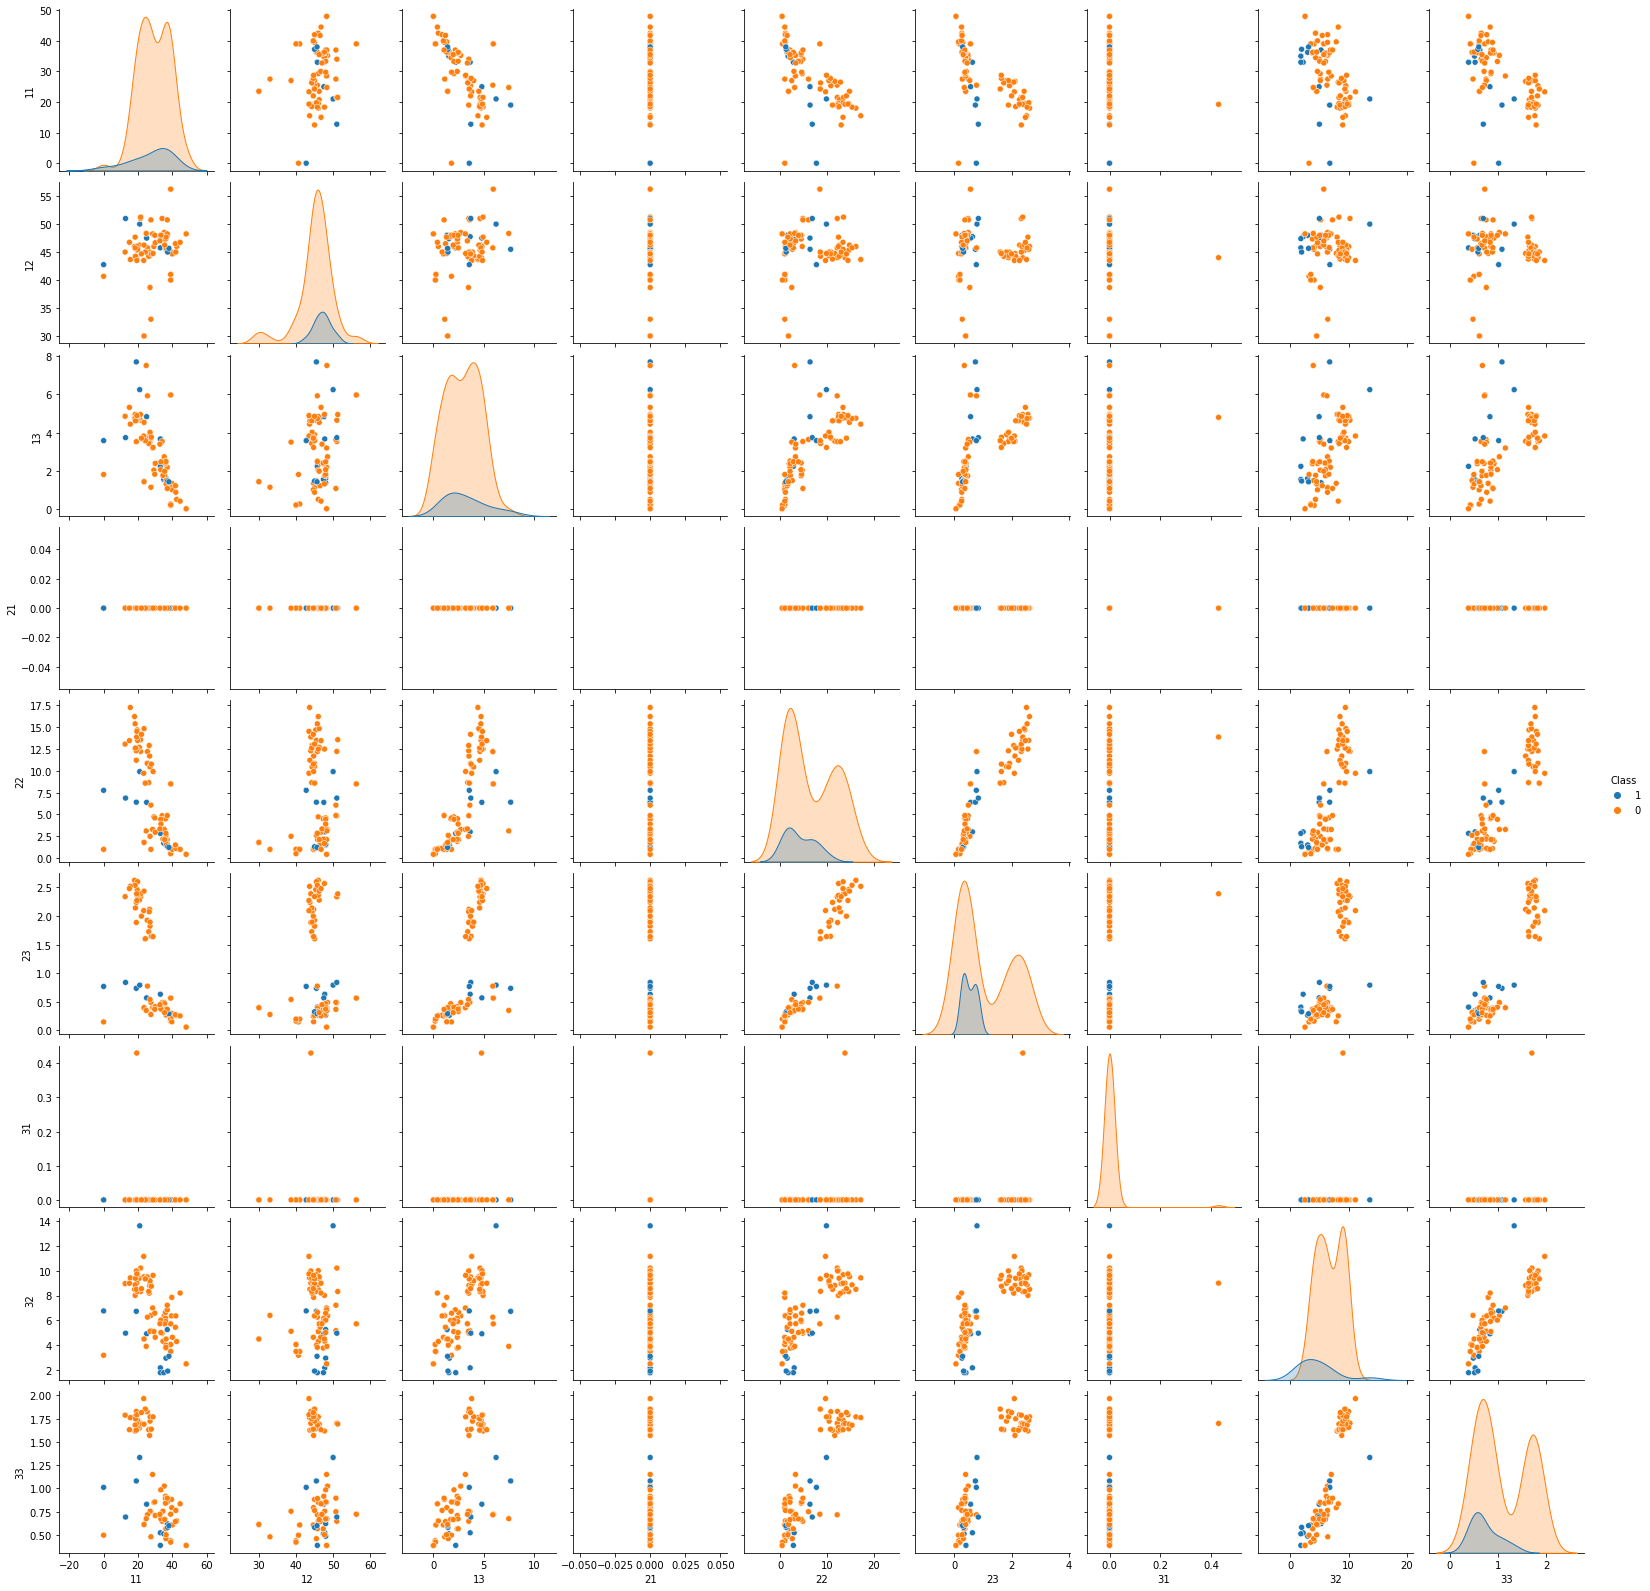

In [ ]:
#Putting labels on TDF
TDF['labels'] = all_labels
TDF['files'] = all_files
TDF['split'] = TTS
for i in range (0,len(TDF['labels'])):
    if TDF['labels'][i] == 'bending1/' or TDF['labels'][i] == 'bending2/':
        TDF['labels'][i] = '1'
    else:
        TDF['labels'][i] = '0'
scatdf = pd.DataFrame()
scatdf["11"] = TDF['min1']
scatdf['12'] = TDF['max1']
scatdf['13'] = TDF['std_dev1']
scatdf['21'] = TDF['min2']
scatdf['22'] = TDF['max2']
scatdf['23'] = TDF['std_dev2']
scatdf['31'] = TDF['min6']
scatdf['32'] = TDF['max6']
scatdf['33'] = TDF['std_dev6']
scatdf["Class"] = TDF['labels']
scatdf
sns.pairplot(scatdf,kind= "scatter",hue = "Class")


## Breaking each time series in training set into two (approximately) equal length time series. Repeating the experiment

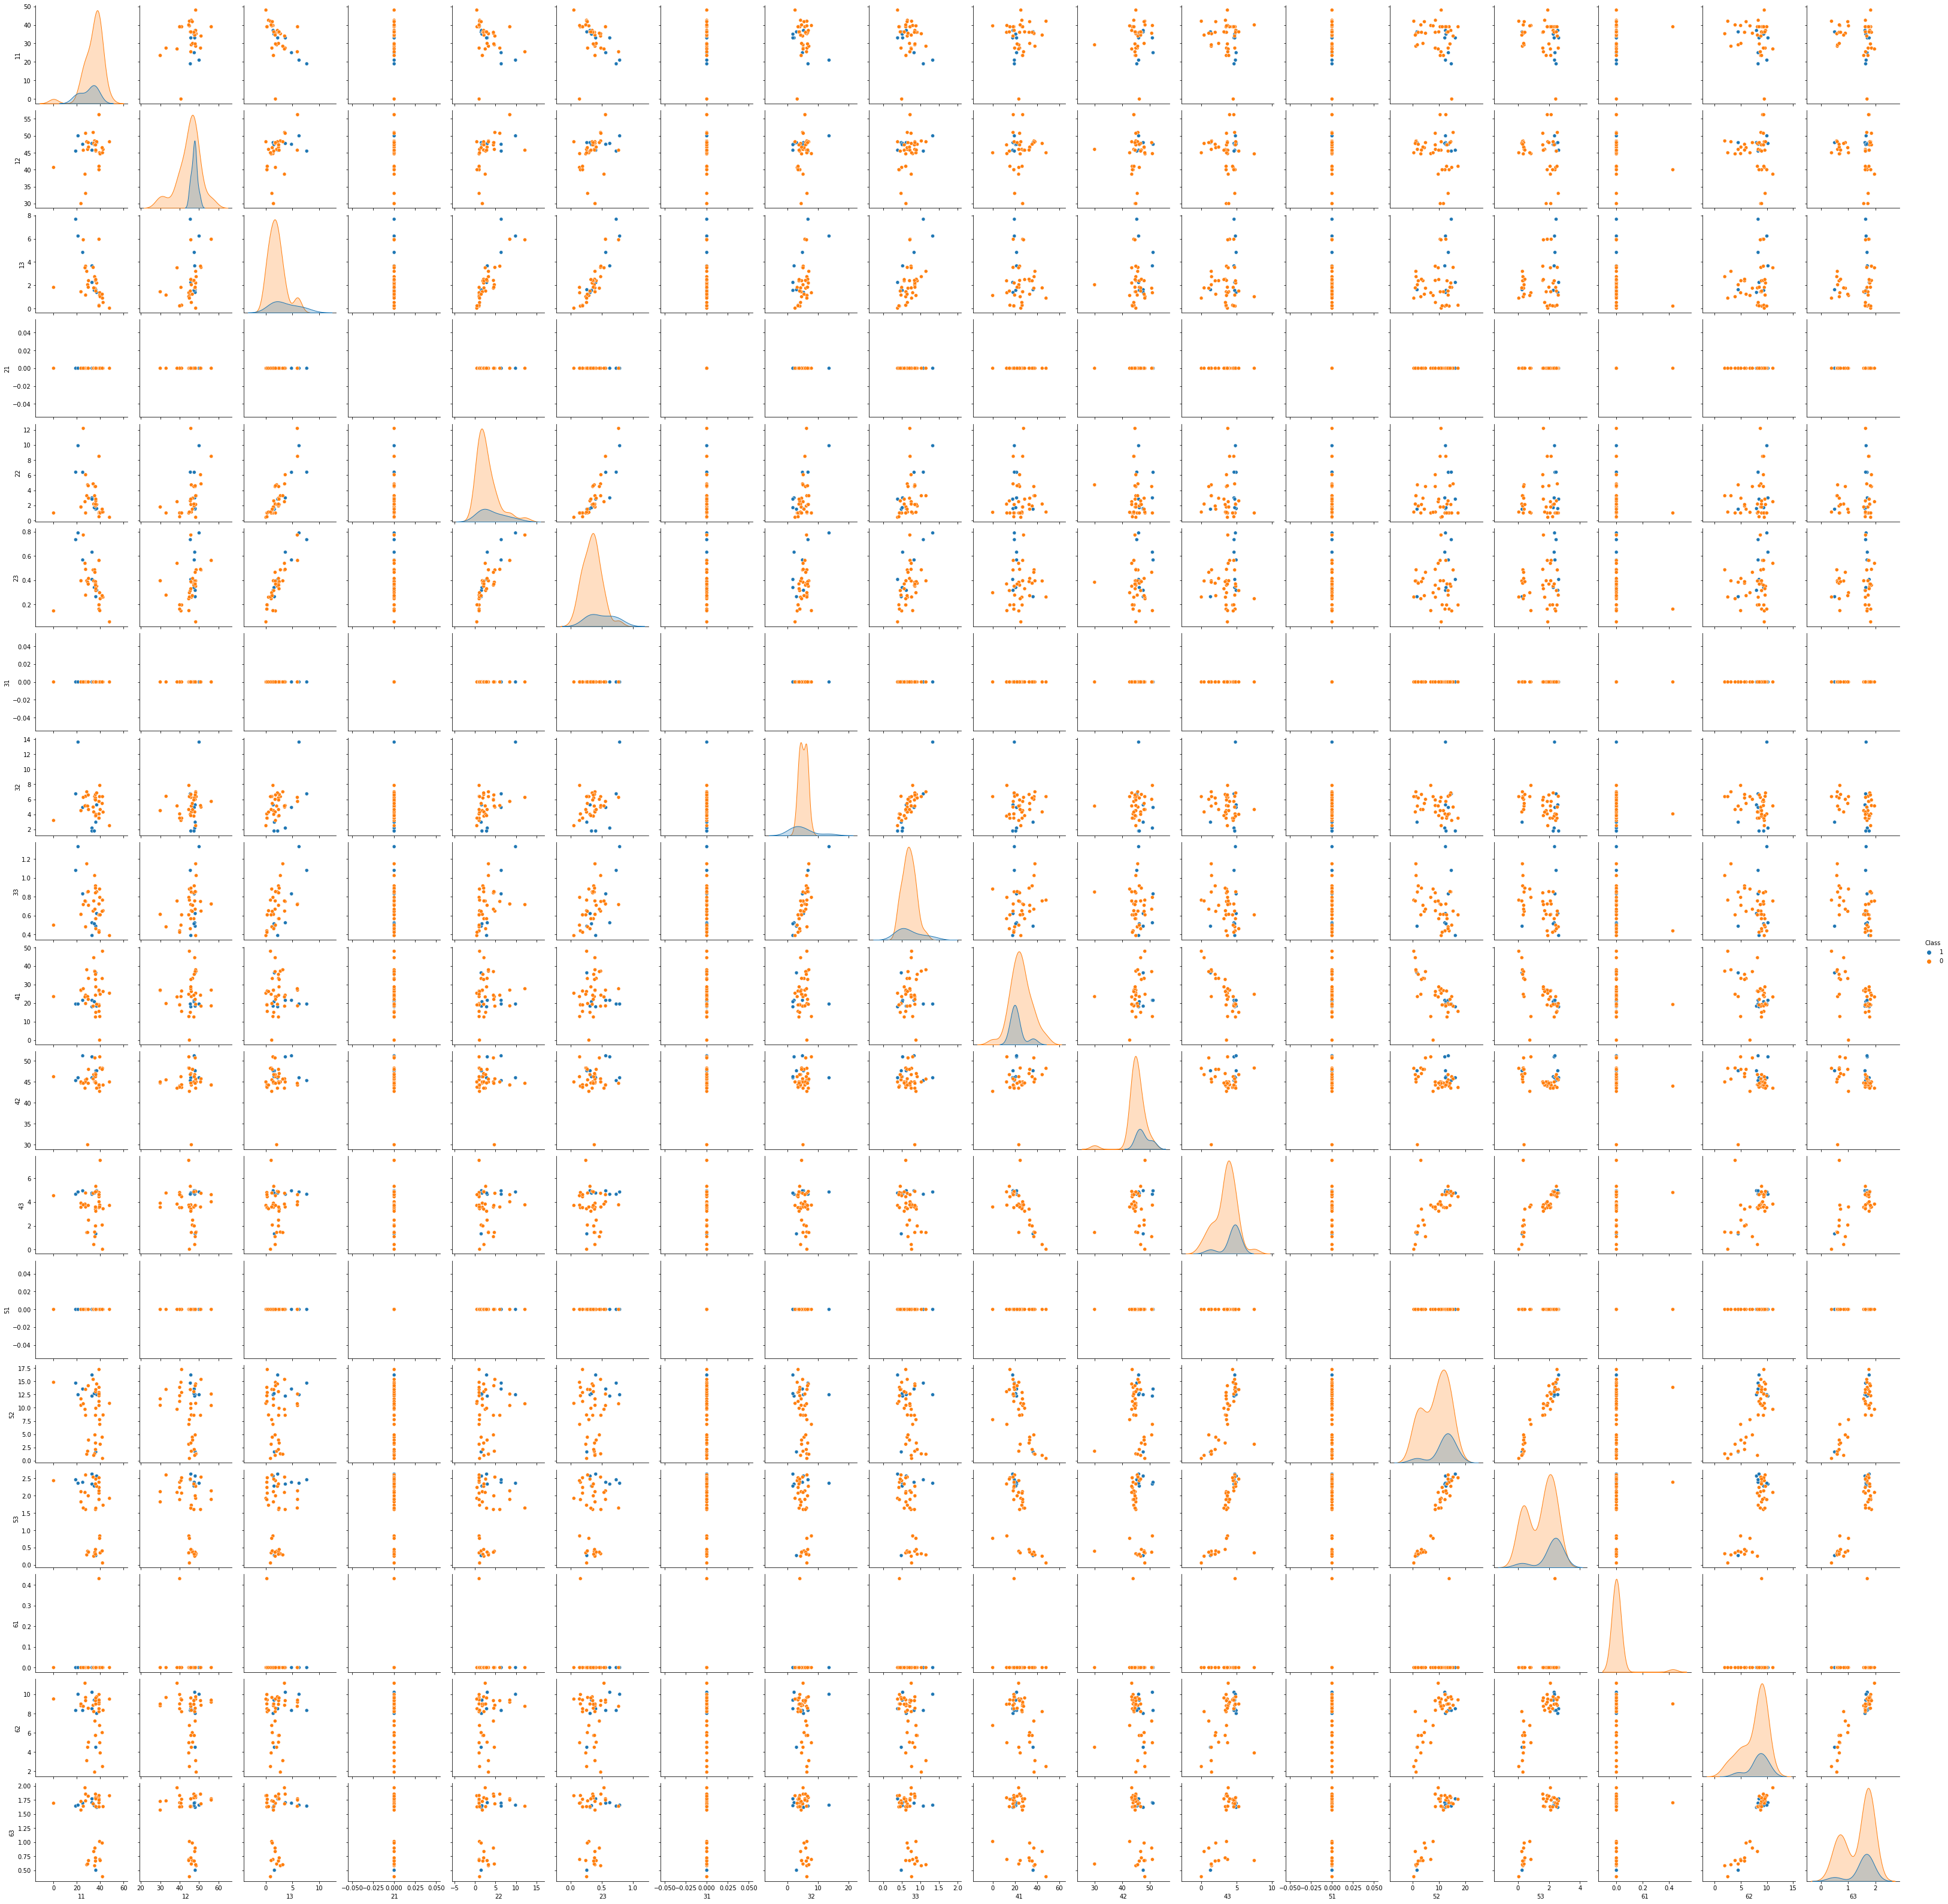

In [ ]:
df1 = scatdf.iloc[:44]
df2 = scatdf.iloc[44:]
df2 = df2.rename(columns={'11':'41', '12':'42', '13':'43', '21':'51', '22':'52', '23':'53', '31':'61', '32':'62', '33':'63', "Class":"Class 2"})
result = pd.concat([df1,df2.reset_index(drop=True)], axis = 1)
sns.pairplot(result,kind= "scatter",hue = "Class")

## Breaking each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and using logistic regression to solve the binary classification problem, using time-domain features

In [ ]:
#RUN LOOP ONLY ONCE. IT IS TIME CONSUMING
l = np.arange(1,21)
Outputs = []
for ls in l:

    split_column = []
    for i in range (1, 7*ls):
        for title in indexes:
            split_column.append('' + title + str(i))
    #print(split_column)

    new_instances = []
    for rest in all_instances:
        temp = rest
        newh = pd.DataFrame()
        firstdf = temp.iloc[:int(len(rest)/ls) , :]
        while(len(temp)>= len(firstdf)):
            #print (len(temp),'  ', len(firstdf))
            df = temp.iloc[:int(len(rest)/ls) , :]
            temp = temp.iloc[ int(len(rest)/ls): , :]
            #print(df.shape)
            #print(temp.shape)
            newh = pd.concat([newh, df.set_index(firstdf.index)], axis=1, join='outer')
        newh = newh.set_axis( range (0, newh.shape[1]), axis=1, inplace=False)

        new_instances.append(newh)

        #print(newh.shape)



    TDFsplitty = pd.DataFrame(columns = split_column)
    i = 0
    for df in  new_instances:
        i = i+1
        stats = []

        for i in range (1, df.drop(0, axis =1).describe().shape[1] + 1):
            stats.append(df.drop(0, axis =1).describe()[i].values.tolist())

        row = list(itertools.chain.from_iterable(stats))
        #list = ["Hyperion", 27000, "60days", 2000]
        TDFsplitty.loc[len(TDFsplitty)] = row
        #TDF = TDF.append(row, axis = 0)


    drop_these = []
    for i in range (1, 7*ls-1):
        drop_these.append('count' +  str(i))
    TDFsplitty = TDFsplitty.drop(drop_these, axis = 1)

    new_columns = []
    ks = ['min','max', 'mean', '50%', 'std',  '25%',  '75%' ]
    for i in range (1, 7*ls-1):
        for f in ks:
            new_columns.append(f +  str(i))
    newTDFsplitty = TDFsplitty.reindex(columns=new_columns)

    rename_columns = []
    tdf = ['min', 'max', 'mean', 'median', 'std_dev', '1st quart', '3rd quart']
    for i in range (1, 7*ls-1):
        for f in tdf:
            rename_columns.append(f +  str(i))
    TDFsplitty = newTDFsplitty.set_axis(rename_columns, axis=1, inplace=False)
    TDFsplitty['labels'] = all_labels
    TDFsplitty['files'] = all_files
    TDFsplitty['split'] = TTS

    Outputs.append(TDFsplitty)



### Label encode with bending = 0 and not bending = 1

In [ ]:
for df in Outputs:
    for i in range(0, len(df)):

            if (df['labels'][i] == 'bending1/') or df['labels'][i] == 'bending2/':
                df['labels'][i] = 0
            else:
                df['labels'][i] = 1

### Train-Test split and Preprocesing

In [ ]:
Train_Dataframes = []
Test_Dataframes = []
for df in Outputs:
    Train = df.loc[df['split'] == 'train']
    Test = df.loc[df['split'] == 'test']
    Train_Dataframes.append(Train)
    Test_Dataframes.append(Test)

New_train = []
New_train_labels = []
New_test = []
New_test_labels = []
for df in Train_Dataframes:

    New_train.append(df.drop(['labels', 'files', 'split'], axis = 1))
    New_train_labels.append(df['labels'])

for df in Test_Dataframes:

    New_test.append(df.drop(['labels', 'files', 'split'], axis = 1))
    New_test_labels.append(df['labels'])

## iii. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination.

In [ ]:
pruned_models = []
pruned_scores = []
pruned_features = []
for i in range(0, len(New_train)):
    scores, pvalues = chi2(New_train[i], New_train_labels[i].astype('int'))
    remove_feat = []
    new_train = New_train[i]
    #new_test = New_test[i]
    #print(i)

    for j in range(0,len(pvalues)):
        if pvalues[j] > 0.05:
            remove_feat.append(New_train[i].columns[i])
    #print(remove_feat)
    new_train = new_train.drop(remove_feat, axis = 1)
    new_test = New_test[i].drop(remove_feat, axis = 1)
    pruned_features.append(new_train.columns)
    clf = LogisticRegressionCV(random_state=0, cv = 5).fit(new_train, New_train_labels[i].astype('int'))
    pruned_models.append(clf)
    #pruned_scores.append(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))
    print('Accuracy: %.3f ' % (mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))))
    pruned_scores.append(mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5)))
print('The best performing l=', pruned_scores.index(max(pruned_scores))+1, 'with an accuracy of', max(pruned_scores))
print('The best performing features for this model is', pruned_features[pruned_scores.index(max(pruned_scores))])
print('The number of features p =', len(pruned_features[pruned_scores.index(max(pruned_scores))]))

Accuracy: 0.943 
Accuracy: 0.927 
Accuracy: 0.927 
Accuracy: 0.913 
Accuracy: 0.913 
Accuracy: 0.913 
Accuracy: 0.927 
Accuracy: 0.927 
Accuracy: 0.913 
Accuracy: 0.899 
Accuracy: 0.913 
Accuracy: 0.927 
Accuracy: 0.927 
Accuracy: 0.913 
Accuracy: 0.913 
Accuracy: 0.913 
Accuracy: 0.913 
Accuracy: 0.913 
Accuracy: 0.927 
The best performing l= 1 with an accuracy of 0.9428571428571428
The best performing features for this model is Index(['max1', 'mean1', 'median1', 'std_dev1', '1st quart1', '3rd quart1',
       'min2', 'max2', 'mean2', 'median2', 'std_dev2', '1st quart2',
       '3rd quart2', 'min3', 'max3', 'mean3', 'median3', 'std_dev3',
       '1st quart3', '3rd quart3', 'min4', 'max4', 'mean4', 'median4',
       'std_dev4', '1st quart4', '3rd quart4', 'min5', 'max5', 'mean5',
       'median5', 'std_dev5', '1st quart5', '3rd quart5'],
      dtype='object')
The number of features p = 34


## Stratified cross validation (due to class imbalance)

In [ ]:
pruned_models_strat = []
pruned_scores_strat = []
pruned_features = []
test_accuracies = []
Testers = []
for i in range(0, len(New_train)):
    scores, pvalues = chi2(New_train[i], New_train_labels[i].astype('int'))
    remove_feat = []
    new_train = New_train[i]
    #new_test = New_test[i]
    #print(i)

    for j in range(0,len(pvalues)):
        if pvalues[j] > 0.05:
            remove_feat.append(New_train[i].columns[i])
    #print(remove_feat)
    new_train = new_train.drop(remove_feat, axis = 1)
    new_test = New_test[i].drop(remove_feat, axis = 1)
    Testers.append(new_test)
    pruned_features.append(new_train.columns)
    skf = StratifiedKFold(n_splits = 5)
    skf.get_n_splits(new_train, New_train_labels[i].astype('int'))
    lst_accu_stratified = []
    for train_index, test_index in skf.split(new_train, New_train_labels[i].astype('int')):
         #print("TRAIN:", train_index, "TEST:", test_index)
         X_train, X_test = [new_train.iloc[train_index], new_train.iloc[test_index]]
         y_train, y_test = [New_train_labels[i].iloc[train_index].astype('int'), New_train_labels[i].iloc[test_index].astype('int')]
         y_test = y_test.astype('int')
         clf = LogisticRegression(random_state=0).fit(X_train, y_train)
         #clf.fit(X_train, y_train)
         lst_accu_stratified.append(clf.score(X_test, y_test))
         #print('\nTESTING ON Train SET')
         #print(clf.score(X_test, y_test))
         #print("Predictions of train data", clf.predict(X_test))
         #print("Actual train data", y_test)

    pruned_scores_strat.append(mean(lst_accu_stratified))
    #clf = LogisticRegression(random_state=0).fit(new_train, New_train_labels[i].astype('int'))
    pruned_models_strat.append(clf)
    #pruned_scores.append(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))
    #print('Accuracy: %.3f ' % (mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))))
    #pruned_scores.append(mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5)))
    #print('TESTING ON TEST SET')
    #print(clf.score(new_test, New_test_labels[i].astype('int')))
    #print("Predictions of test data", clf.predict(new_test))
    test_accuracies.append(clf.score(new_test, New_test_labels[i].astype('int')))
    #print(clf.predict(new_test))


    #print('\n')
print('The best performing l=', pruned_scores_strat.index(max(pruned_scores_strat))+1, 'with an accuracy of', max(pruned_scores_strat))
print('The best performing features for this model is', pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))])
print('The number of features p =', len(pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]))
print('Test accuracy of best model is ',test_accuracies[pruned_scores_strat.index(max(pruned_scores_strat))])

The best performing l= 1 with an accuracy of 0.9571428571428571
The best performing features for this model is Index(['max1', 'mean1', 'median1', 'std_dev1', '1st quart1', '3rd quart1',
       'min2', 'max2', 'mean2', 'median2', 'std_dev2', '1st quart2',
       '3rd quart2', 'min3', 'max3', 'mean3', 'median3', 'std_dev3',
       '1st quart3', '3rd quart3', 'min4', 'max4', 'mean4', 'median4',
       'std_dev4', '1st quart4', '3rd quart4', 'min5', 'max5', 'mean5',
       'median5', 'std_dev5', '1st quart5', '3rd quart5'],
      dtype='object')
The number of features p = 34
Test accuracy of best model is  1.0


## Confusion matrix and the ROC and AUC for classifier on train data.

In [ ]:
best_model = pruned_models_strat[0]
best_dataset_test = New_test[pruned_scores_strat.index(max(pruned_scores_strat))][pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]]
best_dataset_train = New_train[pruned_scores_strat.index(max(pruned_scores_strat))][pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]]
true_labels_train = New_train_labels[pruned_scores_strat.index(max(pruned_scores_strat))].astype('int')
true_labels_test = New_test_labels[pruned_scores_strat.index(max(pruned_scores_strat))].astype('int')
best_preds_train = best_model.predict(best_dataset_train)
confusion_matrix(New_test_labels[pruned_scores_strat.index(max(pruned_scores_strat))].astype('int'), best_model.predict(best_dataset_test))


array([[ 4,  0],
       [ 0, 15]])

Area under the Receiver Operating Characteristic curve: 1.0


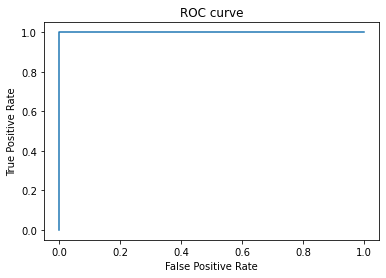

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(true_labels_train, best_preds_train)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(true_labels_train, best_preds_train))

## Parameters of Logistic regression βi’s as well as the p-values associated with them.

In [ ]:
scores, pvalues = chi2(New_train[pruned_scores_strat.index(max(pruned_scores_strat))], New_train_labels[pruned_scores_strat.index(max(pruned_scores_strat))].astype('int'))
used_params = pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]
print("The parameters used and their p values are reported below\n")
for j in range(0,len(pvalues)):
        if pvalues[j] > 0.05:
            print(used_params[j], 'has pvalue', pvalues[j], '\n' )
            #print(used_params[j])

The parameters used and their p values are reported below

max1 has pvalue 0.805158450235747 

mean1 has pvalue 0.3568840661323457 

median1 has pvalue 0.8934594516470586 

std_dev1 has pvalue 0.9185692111394702 

1st quart1 has pvalue 0.25390450919282004 

3rd quart1 has pvalue 0.7117148609337094 

min2 has pvalue 0.8118923676417581 

1st quart2 has pvalue 0.13341572042745137 

max3 has pvalue 0.6455544396360707 

1st quart3 has pvalue 0.10737342565881437 

mean4 has pvalue 0.830071557257009 

median4 has pvalue 0.07919590950491576 

1st quart4 has pvalue 0.6271818664075046 

3rd quart4 has pvalue 0.06797675750620129 

min5 has pvalue 0.050120754019613356 

1st quart5 has pvalue 0.38154488436912226 



## v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [ ]:
print("The test accuracy of the cross validation on train set is was", pruned_scores_strat[pruned_scores_strat.index(max(pruned_scores_strat))])
print("The test accuracy of the model on the pruned test dataset is ",best_model.score(best_dataset_test, true_labels_test.astype('int')))


The test accuracy of the cross validation on train set is was 0.9571428571428571
The test accuracy of the model on the pruned test dataset is  1.0


## vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?
#### Separation means that there are some variables which are very good predictors, which is good, or, separation may be an artifact of too few observations/too many variables. Well seperated classes make the model perform better but the coefficients go to infinity.


## Imbalanced Classes?

In [ ]:
from sklearn.utils import resample
pruned_models_upsampled = []
pruned_scores_upsampled = []
pruned_features_upsampled = []
for i in range(0, len(New_train)):
    exp = New_train[i]
    exp['labels'] = New_train_labels[i]
    not_bending = exp.iloc[np.where(exp['labels'] == 1)[0]]
    bending = exp.iloc[np.where(exp['labels'] == 0)[0]]
    spam_upsample = resample(bending,
                 replace=True,
                 n_samples=len(not_bending),
                 random_state=42)
    spam_upsample = spam_upsample.append(not_bending)
    scores, pvalues = chi2(spam_upsample.iloc[: , :-1], spam_upsample.iloc[: , -1:].astype('int')['labels'])
    remove_feat = []
    new_train = spam_upsample.iloc[: , :-1]
    #new_test = New_test[i]
    #print(i)

    for j in range(0,len(pvalues)):
        if pvalues[j] > 0.05:
            remove_feat.append(New_train[i].columns[i])
    #print(remove_feat)
    new_train = new_train.drop(remove_feat, axis = 1)
    new_test = New_test[i].drop(remove_feat, axis = 1)
    pruned_features_upsampled.append(new_train.columns)
    clf = LogisticRegression(random_state=0).fit(new_train, spam_upsample.iloc[: , -1:].astype('int')['labels'])
    pruned_models_upsampled.append(clf)
    pruned_scores_upsampled.append(mean(cross_val_score(clf, new_train, spam_upsample.iloc[: , -1:].astype('int')['labels'], cv=5)))
    #print('Accuracy: %.3f ' % (mean(cross_val_score(clf, new_train, spam_upsample.iloc[: , -1:].astype('int')['labels'], cv=5))))
    #pruned_scores.append(mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5)))


## Confusion matrix, ROC, and AUC of the model.

In [ ]:
best_model_upsampled = pruned_models_upsampled[pruned_scores_upsampled.index(max(pruned_scores_upsampled))]
best_dataset_test = New_test[pruned_scores_upsampled.index(max(pruned_scores_upsampled))][pruned_features_upsampled[pruned_scores_upsampled.index(max(pruned_scores_upsampled))]]
best_dataset_train = New_train[pruned_scores_upsampled.index(max(pruned_scores_upsampled))][pruned_features_upsampled[pruned_scores_upsampled.index(max(pruned_scores_upsampled))]]
true_labels_train = New_train_labels[pruned_scores_upsampled.index(max(pruned_scores_upsampled))].astype('int')
true_labels_test = New_test_labels[pruned_scores_upsampled.index(max(pruned_scores_upsampled))].astype('int')
best_preds_train = best_model.predict(best_dataset_train)
confusion_matrix(New_test_labels[pruned_scores_upsampled.index(max(pruned_scores_upsampled))].astype('int'), best_model.predict(best_dataset_test))


array([[ 4,  0],
       [ 0, 15]])

Area under the Receiver Operating Characteristic curve: 1.0


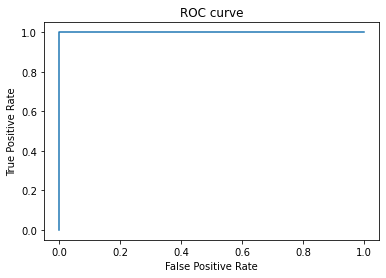

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(true_labels_train, best_preds_train)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:',
      roc_auc_score(true_labels_train, best_preds_train))

In [ ]:
Train_Dataframes = []
Test_Dataframes = []
for df in Outputs:
    Train = df.loc[df['split'] == 'train']
    Test = df.loc[df['split'] == 'test']
    Train_Dataframes.append(Train)
    Test_Dataframes.append(Test)

New_train = []
New_train_labels = []
New_test = []
New_test_labels = []
for df in Train_Dataframes:

    New_train.append(df.drop(['Unnamed: 0', 'labels', 'files', 'split'], axis = 1))
    New_train_labels.append(df['labels'])

for df in Test_Dataframes:

    New_test.append(df.drop(['Unnamed: 0', 'labels', 'files', 'split'], axis = 1))
    New_test_labels.append(df['labels'])

#Binary Classification Using L1-penalized logistic regression

##  Repeating using L1-penalized logistic regression,( instead of using p- values for variable selection, use L1 regularization). Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget).

In [ ]:
record_of_Cs = []
pruned_models_l1 = []
pruned_scores_l1 = []
pruned_features_l1 = []
test_accuracies_l1 = []
train_accuracies_l1 = []
Testers = []
C = [10, 1, 0.1, 0.01]
for i in range(0, len(New_train)):

    for c in C:
        clf = LogisticRegression(random_state=0, penalty='l1', C=c, solver='liblinear')
        #clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
        clf.fit(New_train[i], New_train_labels[i].astype('int'))
        #print('C:', c)
        #print('Coefficient of each feature:', clf.coef_)
        #print('Training accuracy:', clf.score(New_train[i], New_train_labels[i].astype('int')))
        #print('Test accuracy:', clf.score(New_test[i], New_test_labels[i].astype('int')))
        #print('')
        record_of_Cs.append(c)
        test_accuracies_l1.append(clf.score(New_test[i], New_test_labels[i].astype('int')))



    #pruned_scores_strat.append(mean(lst_accu_stratified))
    #clf = LogisticRegression(random_state=0).fit(new_train, New_train_labels[i].astype('int'))
    #pruned_models_strat.append(clf)
    #pruned_scores.append(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))
    #print('Accuracy: %.3f ' % (mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))))
    #pruned_scores.append(mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5)))
    #print('TESTING ON TEST SET')
    #print(clf.score(new_test, New_test_labels[i].astype('int')))
    #print("Predictions of test data", clf.predict(new_test))
    #test_accuracies.append(clf.score(new_test, New_test_labels[i].astype('int')))
    #print(clf.predict(new_test))


    #print('\n')
#print('The best performing l=', pruned_scores_strat.index(max(test_accuracies_l1))+1)
#print('The best performing features for this model is', pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))])
#print('The number of features p =', len(pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]))
#print('test accuracy of best model is ',test_accuracies[pruned_scores_strat.index(max(pruned_scores_strat))])
print("the best C is", record_of_Cs[test_accuracies_l1.index(max(test_accuracies_l1))])
print("the best l is", test_accuracies_l1.index(max(test_accuracies_l1)) + 1)

the best C is 10
the best l is 1


## Comparison of the L1-penalized with variable selection using p-values

In [ ]:
print("The test accuracies of feature selection using pvalues are", mean(test_accuracies))
print("The test accuracies of feature selection using l1 penalizing are", mean(test_accuracies_l1))

The test accuracies of feature selection using pvalues are 0.9972299168975068
The test accuracies of feature selection using l1 penalizing are 0.9085872576177285


#### The results clearly show that pvalues are better at feature selection than l1 penalization. The one easier to implement is also variable selection using p-values.

## Multi-class Classification (The Realistic Case)


### Label encoding all classes

In [ ]:
for i in range(0, len(Outputs)):
    label_encoder = preprocessing.LabelEncoder()
    Outputs[i]['labels']= label_encoder.fit_transform(Outputs[0]['labels'])

### Train Test Split and other preprocessing

In [ ]:
Train_Dataframes = []
Test_Dataframes = []
for df in Outputs:
    Train = df.loc[df['split'] == 'train']
    Test = df.loc[df['split'] == 'test']
    Train_Dataframes.append(Train)
    Test_Dataframes.append(Test)

New_train = []
New_train_labels = []
New_test = []
New_test_labels = []
for df in Train_Dataframes:

    New_train.append(df.drop(['labels', 'files', 'split'], axis = 1))
    New_train_labels.append(df['labels'])

for df in Test_Dataframes:

    New_test.append(df.drop([labels', 'files', 'split'], axis = 1))
    New_test_labels.append(df['labels'])

## Finding the best l to build an L1- penalized multinomial regression model to classify all activities in training set

In [ ]:
record_of_Cs = []
record_of_is = []
pruned_models_l1 = []
pruned_scores_l1 = []
pruned_features_l1 = []
test_accuracies_l1 = []
train_accuracies_l1 = []
Testers = []
for i in range(0, len(New_train)):

    for c in C:
        clf = LogisticRegression(random_state=0, penalty='l1', C=c, solver='liblinear')
        #clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
        clf.fit(New_train[i], New_train_labels[i].astype('int'))
        #print('C:', c)
        #print('Coefficient of each feature:', clf.coef_)
        #print('Training accuracy:', clf.score(New_train[i], New_train_labels[i].astype('int')))
        #print('Test accuracy:', clf.score(New_test[i], New_test_labels[i].astype('int')))
        #print('')
        record_of_Cs.append(c)
        record_of_is.append(i)
        test_accuracies_l1.append(clf.score(New_test[i], New_test_labels[i].astype('int')))
        pruned_models_l1.append(clf)



    #pruned_scores_strat.append(mean(lst_accu_stratified))
    #clf = LogisticRegression(random_state=0).fit(new_train, New_train_labels[i].astype('int'))
    #pruned_models_strat.append(clf)
    #pruned_scores.append(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))
    #print('Accuracy: %.3f ' % (mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5))))
    #pruned_scores.append(mean(cross_val_score(clf, new_train, New_train_labels[i].astype('int'), cv=5)))
    #print('TESTING ON TEST SET')
    #print(clf.score(new_test, New_test_labels[i].astype('int')))
    #print("Predictions of test data", clf.predict(new_test))
    #test_accuracies.append(clf.score(new_test, New_test_labels[i].astype('int')))
    #print(clf.predict(new_test))


    #print('\n')
#print('The best performing l=', pruned_scores_strat.index(max(test_accuracies_l1))+1)
#print('The best performing features for this model is', pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))])
#print('The number of features p =', len(pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]))
#print('test accuracy of best model is ',test_accuracies[pruned_scores_strat.index(max(pruned_scores_strat))])
print("the best C is", record_of_Cs[test_accuracies_l1.index(max(test_accuracies_l1))])
print("the best l is", record_of_is[test_accuracies_l1.index(max(test_accuracies_l1))] + 1)
print("the lowest test error is", 1-max(test_accuracies_l1))



the best C is 1
the best l is 5
the lowest test error is 0.052631578947368474


#### The misclassified datapoints are the ones that are not on the diagonal. The row depicts the class that it was predicted to be while the oclumn depicts the class that it actually was

In [ ]:
best_model_multiclass = pruned_models_l1[test_accuracies_l1.index(max(test_accuracies_l1))]
best_dataset_multiclass = New_test[record_of_is[test_accuracies_l1.index(max(test_accuracies_l1))]]
confusion_matrix(New_test_labels[record_of_is[test_accuracies_l1.index(max(test_accuracies_l1))]], best_model_multiclass.predict(best_dataset_multiclass))


array([[2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 3]])

## Using a Naıve Bayes’ classifier. (Both Gaussian and Multinomial priors and comparison of the results)

In [ ]:
record_of_Cs = []
record_of_is = []
pruned_models_nb = []
pruned_scores_nb = []
pruned_features_nb = []
test_accuracies_nb = []
train_accuracies_nb = []


pruned_models_mnb = []
pruned_scores_mnb = []
pruned_features_mnb = []
test_accuracies_mnb = []
train_accuracies_mnb = []


for i in range(0, len(New_train)):

    gnb = GaussianNB()
    pruned_models_nb.append(gnb.fit(New_train[i], New_train_labels[i]))
    test_accuracies_nb.append(gnb.score(New_test[i], New_test_labels[i]))
    mnb = MultinomialNB()
    pruned_models_mnb.append(mnb.fit(New_train[i], New_train_labels[i]))
    test_accuracies_mnb.append(mnb.score(New_test[i], New_test_labels[i]))








    #print('\n')
print('The best performing l for Gaussian is l=', test_accuracies_nb.index(max(test_accuracies_nb))+1)
#print('The best performing features for this model is', pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))])
#print('The number of features p =', len(pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]))
print('Test error of best model for Gaussian is ', 1-max(test_accuracies_nb))
print('The best performing l for Multinomial Naive Bayes is l=', test_accuracies_mnb.index(max(test_accuracies_mnb))+1)
#print('The best performing features for this model is', pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))])
#print('The number of features p =', len(pruned_features[pruned_scores_strat.index(max(pruned_scores_strat))]))
print('Test error of best model for Multinomial Naive Bayes is ',1- max(test_accuracies_mnb))







The best performing l for Gaussian is l= 1
Test error of best model for Gaussian is  0.10526315789473684
The best performing l for Multinomial Naive Bayes is l= 17
Test error of best model for Multinomial Naive Bayes is  0.052631578947368474


In [ ]:
best_model_nb = pruned_models_nb[test_accuracies_nb.index(max(test_accuracies_nb))]
best_dataset_nb = New_test[test_accuracies_nb.index(max(test_accuracies_nb))]
print('Confusion matrix for Gaussian Naive Bayes\n')
print(confusion_matrix(New_test_labels[test_accuracies_nb.index(max(test_accuracies_nb))], best_model_nb.predict(best_dataset_nb)))

best_model_mnb = pruned_models_mnb[test_accuracies_mnb.index(max(test_accuracies_mnb))]
best_dataset_mnb = New_test[test_accuracies_mnb.index(max(test_accuracies_mnb))]
print('\nConfusion matrix for Multinomial Naive Bayes\n')
print(confusion_matrix(New_test_labels[test_accuracies_mnb.index(max(test_accuracies_mnb))], best_model_mnb.predict(best_dataset_mnb)))






Confusion matrix for Gaussian Naive Bayes

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 2 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]

Confusion matrix for Multinomial Naive Bayes

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


#### Logistic Regression using l1 penalization has proved to be the better method for multiclass classification for this particular application and dataset.